# "Working with NumPy"
> "Looking at Bangor preciptiation data using only NumPy and matplotlib."

- toc: false
- badges: true
- comments: true
- author: Antonio Jurlina
- categories: [learning, python]

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir('/Users/antoniojurlina/Projects/learning_python/data/')

csv = "BangorPrecip.csv"
bangorprecip = pd.read_csv(csv, index_col=0)

months = bangorprecip.index.to_numpy()
years = bangorprecip.columns.to_numpy()
bangorprecip = bangorprecip.to_numpy()
print(bangorprecip.shape)
bangorprecip

(12, 10)


array([[3.47, 1.66, 1.95, 0.87, 3.18, 2.69, 2.38, 3.63, 5.53, 5.15],
       [2.19, 2.19, 1.55, 2.04, 1.99, 2.2 , 3.89, 2.26, 2.99, 1.83],
       [4.68, 4.5 , 1.4 , 2.05, 3.65, 1.45, 3.27, 2.07, 2.18, 1.94],
       [2.24, 5.26, 3.99, 1.77, 2.28, 2.39, 2.58, 3.98, 4.77, 5.53],
       [1.73, 3.51, 5.12, 4.56, 3.31, 2.32, 2.09, 6.36, 2.37, 4.43],
       [4.38, 2.79, 7.05, 5.46, 3.59, 4.9 , 2.85, 4.32, 5.42, 5.33],
       [2.15, 2.1 , 0.58, 3.74, 6.78, 1.16, 2.69, 1.91, 2.48, 4.46],
       [1.89, 8.32, 2.6 , 4.69, 2.96, 2.63, 2.24, 1.64, 2.73, 7.54],
       [5.73, 2.79, 6.33, 7.17, 0.89, 6.89, 1.23, 2.69, 2.63, 2.81],
       [5.83, 5.16, 6.96, 1.02, 6.85, 2.58, 3.2 , 5.59, 4.66, 5.8 ],
       [4.75, 2.19, 1.13, 3.76, 3.21, 2.26, 4.16, 3.05, 7.  , 3.97],
       [5.47, 3.85, 3.59, 2.93, 5.23, 4.06, 3.77, 3.83, 4.23, 3.21]])

**1.	What was the total cumulative precipitation over the ten years?**

In [5]:
total_precip = np.sum(bangorprecip)
print("Total cumulative precipitation over the ten years was", total_precip, "inches.")

Total cumulative precipitation over the ten years was 425.26 inches.


**2.	What was the driest year?**

In [8]:
yearly_totals = bangorprecip.sum(0)
precip = float(yearly_totals[yearly_totals == yearly_totals.min()])
year = int(years[yearly_totals == yearly_totals.min()])
print("The driest year was", year, "with a total of", precip, "inches of precipitation.")



The driest year was 2016 with a total of 34.35 inches of precipitation.


**3.	What are the yearly precipitation means?**

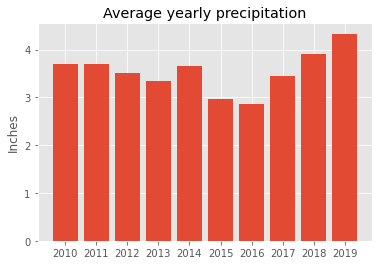

In [6]:
averages = bangorprecip.mean(0)

%matplotlib inline
plt.style.use('ggplot')

plt.bar(years, averages)
plt.title("Average yearly precipitation")
plt.ylabel("Inches")

plt.show()

**4. What are the monthly min, mean, and max values over the ten years?**

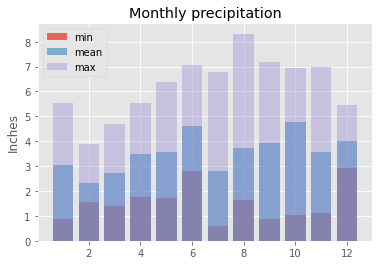

In [7]:
mins = bangorprecip.min(1)
means = bangorprecip.mean(1)
maxs = bangorprecip.max(1)

%matplotlib inline
plt.style.use('ggplot')

plt.bar(months, mins, alpha = 0.8)
plt.bar(months, means, alpha = 0.6)
plt.bar(months, maxs, alpha = 0.4)
plt.title("Monthly precipitation")
plt.ylabel("Inches")
plt.legend(["min", "mean", "max"])

plt.show()

**5.	What was the smallest monthly precipitation value and in which month and year did this occur?**

In [8]:
yearly_mins = bangorprecip.min(0)
monthly_mins = bangorprecip.min(1)

year = int(years[yearly_mins == yearly_mins.min()])
month = int(months[monthly_mins == monthly_mins.min()])
min_precip = bangorprecip.min(1).min()

print("The smallest monthly precipitation was ", min_precip, 
      " inches and it occured during ", month,"/",year, ".", sep = "")

The smallest monthly precipitation was 0.58 inches and it occured during 7/2012.


**6. How many months had precipitation amounts greater than 5 inches?**

In [9]:
answer = np.sum(bangorprecip > 5)
print(answer, "months had precitipation amounts greater than 5 inches.")

26 months had precitipation amounts greater than 5 inches.


**7. How many months had precipitation greater than zero and less than 1.5 inches? What were these values and in what months and years did they occur?**

In [10]:
answer = np.logical_and([bangorprecip > 0], [bangorprecip < 1.5])

print(np.sum(answer), "months had precipitation greater than 0 and less than 1.5 inches.")
print("")

for count,val in enumerate(years):
    month = months[bangorprecip[:,count] < 1.5]
    values = bangorprecip[:,2][bangorprecip[:,count] < 1.5]
    if sum(values) != 0:
        print("In", years[count], ", month(s)", month, 
             "had rainfalls of", values, ", respectively.");

9 months had precipitation greater than 0 and less than 1.5 inches.

In 2012 , month(s) [ 3  7 11] had rainfalls of [1.4  0.58 1.13] , respectively.
In 2013 , month(s) [ 1 10] had rainfalls of [1.95 6.96] , respectively.
In 2014 , month(s) [9] had rainfalls of [6.33] , respectively.
In 2015 , month(s) [3 7] had rainfalls of [1.4  0.58] , respectively.
In 2016 , month(s) [9] had rainfalls of [6.33] , respectively.


**8. How different were monthly precipitation values in 2019 from 2018?**

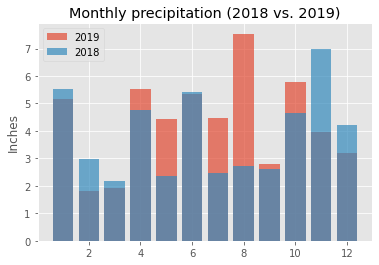

In [17]:
nineteen = np.concatenate(bangorprecip[:,years == '2019'])
eighteen = np.concatenate(bangorprecip[:,years == '2018'])

%matplotlib inline
plt.style.use('ggplot')

plt.bar(months, nineteen, alpha = 0.7)
plt.bar(months, eighteen, alpha = 0.7)
plt.title("Monthly precipitation (2018 vs. 2019)")
plt.ylabel("Inches")
plt.legend(["2019", "2018"])

plt.show()

**9. Create a heatmap of the 12 x 10 array**

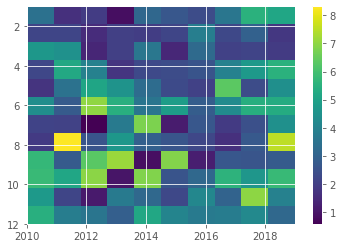

In [12]:
%matplotlib inline
plt.style.use('ggplot')

imgplot = plt.imshow(bangorprecip, extent=[2010,2019,12,1], aspect='auto', cmap='viridis')
plt.colorbar();


For the data and other notebooks, see [github.com/antoniojurlina/learning_python](https://github.com/antoniojurlina/learning_python).